In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
import os
import shutil

# Define paths for existing data
SEISMIC_ATTRIBUTE_NAME_1 = '/home/motto/Documents/Seismic_Layer_Segmentation/raw-data/Datasets/SEG2020/Images/Amplitude'
SEISMIC_ATTRIBUTE_NAME_2 = '/home/motto/Documents/Seismic_Layer_Segmentation/raw-data/Datasets/SEG2020/Images/Semblance'

DATA_IMAGES_PATH_1 = os.path.abspath(os.path.join('Datasets', 'SEG2020', 'Images', SEISMIC_ATTRIBUTE_NAME_1))
DATA_IMAGES_PATH_2 = os.path.abspath(os.path.join('Datasets', 'SEG2020', 'Images', SEISMIC_ATTRIBUTE_NAME_2))

assert os.path.exists(DATA_IMAGES_PATH_1), "Data images path 1 does not exist"
assert os.path.exists(DATA_IMAGES_PATH_2), "Data images path 2 does not exist"

# Define paths for inline and crossline subfolders in both main folders
INLINE_DATA_PATH_1 = os.path.join(DATA_IMAGES_PATH_1, 'Inlines')
CROSSLINE_DATA_PATH_1 = os.path.join(DATA_IMAGES_PATH_1, 'Crosslines')

INLINE_DATA_PATH_2 = os.path.join(DATA_IMAGES_PATH_2, 'Inlines')
CROSSLINE_DATA_PATH_2 = os.path.join(DATA_IMAGES_PATH_2, 'Crosslines')

# Ensure paths for inline and crossline images exist
assert os.path.exists(INLINE_DATA_PATH_1), "Inline data images path 1 does not exist"
assert os.path.exists(CROSSLINE_DATA_PATH_1), "Crossline data images path 1 does not exist"
assert os.path.exists(INLINE_DATA_PATH_2), "Inline data images path 2 does not exist"
assert os.path.exists(CROSSLINE_DATA_PATH_2), "Crossline data images path 2 does not exist"

# Define the range of images to be copied
start_range_inline_folder_1, end_range_inline_folder_1 = 10, 300
start_range_inline_folder_2, end_range_inline_folder_2 = 301, 500
start_range_crossline_folder_1, end_range_crossline_folder_1 = 10, 300
start_range_crossline_folder_2, end_range_crossline_folder_2 = 301, 500


# Set new location for storing the new folder
NEW_LOCATION_PATH = '/home/motto/Documents/Seismic_Layer_Segmentation/raw-data/nagesh/test_1'  # Replace with your desired path
NEW_MAIN_FOLDER_PATH = os.path.join(NEW_LOCATION_PATH, 'SelectedImages')
NEW_INLINE_FOLDER_PATH = os.path.join(NEW_MAIN_FOLDER_PATH, 'Inlines')
NEW_CROSSLINE_FOLDER_PATH = os.path.join(NEW_MAIN_FOLDER_PATH, 'Crosslines')

# Create the new main and subfolders if they do not exist
os.makedirs(NEW_INLINE_FOLDER_PATH, exist_ok=True)
os.makedirs(NEW_CROSSLINE_FOLDER_PATH, exist_ok=True)

# Copy specified range of inline images from the first folder to the new inline folder
for i in range(start_range_inline_folder_1, end_range_inline_folder_1 + 1):
    filename = f"{i}.png"  # Assuming filenames are numeric with '.png' extension
    src_inline_path_1 = os.path.join(INLINE_DATA_PATH_1, filename)
    if os.path.exists(src_inline_path_1):
        shutil.copy(src_inline_path_1, NEW_INLINE_FOLDER_PATH)

# Copy specified range of inline images from the second folder to the new inline folder
for i in range(start_range_inline_folder_2, end_range_inline_folder_2 + 1):
    filename = f"{i}.png"  # Assuming filenames are numeric with '.png' extension
    src_inline_path_2 = os.path.join(INLINE_DATA_PATH_2, filename)
    if os.path.exists(src_inline_path_2):
        shutil.copy(src_inline_path_2, NEW_INLINE_FOLDER_PATH)

# Copy specified range of crossline images from the first folder to the new crossline folder
for i in range(start_range_crossline_folder_1, end_range_crossline_folder_1 + 1):
    filename = f"{i}.png"  # Assuming filenames are numeric with '.png' extension
    src_crossline_path_1 = os.path.join(CROSSLINE_DATA_PATH_1, filename)
    if os.path.exists(src_crossline_path_1):
        shutil.copy(src_crossline_path_1, NEW_CROSSLINE_FOLDER_PATH)

# Copy specified range of crossline images from the second folder to the new crossline folder
for i in range(start_range_crossline_folder_2, end_range_crossline_folder_2 + 1):
    filename = f"{i}.png"  # Assuming filenames are numeric with '.png' extension
    src_crossline_path_2 = os.path.join(CROSSLINE_DATA_PATH_2, filename)
    if os.path.exists(src_crossline_path_2):
        shutil.copy(src_crossline_path_2, NEW_CROSSLINE_FOLDER_PATH)

print(f"Selected images have been copied to the new folder at {NEW_MAIN_FOLDER_PATH}.")


Selected images have been copied to the new folder at /home/motto/Documents/Seismic_Layer_Segmentation/raw-data/nagesh/test_1/SelectedImages.


In [16]:
#@title Import Modules and Constant Variables

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")





# Dataset
'''
V2.1
Amplitude
Cosine Instantaneous Phase
Dominant Frequency
Envelope
Instantaneous Bandwith
Instantaneous Frequency
Instantaneous Phase
Reflection Intensity
Second Derivative
Semblance
Sweetness
'''


SEISMIC_ATTRIBUTE_NAME = '/home/motto/Documents/Seismic_Layer_Segmentation/raw-data/nagesh/test_1/SelectedImages'


# # Images for training
DATA_IMAGES_PATH = os.path.abspath(os.path.join('Datasets', 'SEG2020', 'Images', SEISMIC_ATTRIBUTE_NAME))
assert os.path.exists(DATA_IMAGES_PATH), "Data images path does not exist"

INLINE_DATA_IMAGES_PATH = os.path.join(DATA_IMAGES_PATH, 'Inlines')
assert os.path.exists(INLINE_DATA_IMAGES_PATH), "Inline data images path does not exist"

CROSSLINE_DATA_IMAGES_PATH = os.path.join(DATA_IMAGES_PATH, 'Crosslines')
assert os.path.exists(CROSSLINE_DATA_IMAGES_PATH), "Crossline data images path does not exist"



# Images label
LABEL_IMAGES_PATH = os.path.abspath(os.path.join('Datasets', 'SEG2020', 'Images', '/home/motto/Documents/Seismic_Layer_Segmentation/raw-data/Datasets/SEG2020/Images/Labels'))
assert os.path.exists(LABEL_IMAGES_PATH), "Label images path does not exist"

INLINE_LABEL_IMAGES_PATH = os.path.join(LABEL_IMAGES_PATH, 'Inlines')
assert os.path.exists(INLINE_LABEL_IMAGES_PATH), "Inline label images path does not exist"

CROSSLINE_LABEL_IMAGES_PATH = os.path.join(LABEL_IMAGES_PATH, 'Crosslines')
assert os.path.exists(CROSSLINE_LABEL_IMAGES_PATH), "Crossline label images path does not exist"


# def split_and_store_validation_ranges(files, train_ratio=0.8, val_ratio=0.1, random_state=42):
#     """
#     Splits files into training, validation range 1, and validation range 2,
#     and returns their start and end indices.
#     :param files: List of file names (sorted).
#     :param train_ratio: Proportion of data to be used for training (between 0 and 1).
#     :param val_ratio: Proportion of data to be used for validation.
#     :param random_state: Random seed for reproducibility of the split.
#     :return: Arrays containing start and end indices for training and validation ranges.
#     """
#     total_indices = list(range(len(files)))  # Generate indices for files
#     train_indices, val_indices = train_test_split(total_indices, train_size=train_ratio, random_state=random_state)

#     # Split the validation set further into two ranges
#     val_range1_size = int(len(val_indices) * val_ratio)
#     val_range1 = val_indices[:val_range1_size]
#     val_range2 = val_indices[val_range1_size:]

#     # Convert indices into start and end ranges
#     train_range = (train_indices[0], train_indices[-1]) if train_indices else None
#     val_range1_start_end = (val_range1[0], val_range1[-1]) if val_range1 else None
#     val_range2_start_end = (val_range2[0], val_range2[-1]) if val_range2 else None

#     return train_range, val_range1_start_end, val_range2_start_end

# # Split inline and crossline files into train and validation ranges
# inline_train_range, inline_val_range1, inline_val_range2 = split_and_store_validation_ranges(INLINE_DATA_IMAGES_PATH)
# crossline_train_range, crossline_val_range1, crossline_val_range2 = split_and_store_validation_ranges(CROSSLINE_DATA_IMAGES_PATH)

# # Output the ranges for inline and crossline data
# print("Inline Training Range:", inline_train_range)
# print("Inline Validation Range 1:", inline_val_range1)
# print("Inline Validation Range 2:", inline_val_range2)
# print("Crossline Training Range:", crossline_train_range)
# print("Crossline Validation Range 1:", crossline_val_range1)
# print("Crossline Validation Range 2:", crossline_val_range2)


import os
import re

# Function to get a sorted list of numeric filenames in a directory
def get_sorted_numeric_filenames(directory):
    """Fetch numeric filenames and return a sorted list of integers."""
    filenames = os.listdir(directory)
    numeric_parts = [int(re.search(r'\d+', f).group()) for f in filenames if re.search(r'\d+', f)]
    if not numeric_parts:
        raise ValueError(f"No numeric filenames found in directory: {directory}")
    return sorted(numeric_parts)

# Function to calculate ranges for splitting
def calculate_split_ranges(sorted_filenames, split_ratio=0.8):
    """Calculate range of training and testing data."""
    total_count = len(sorted_filenames)
    if total_count == 0:
        raise ValueError("Sorted filenames list is empty. Cannot calculate ranges.")

    split_index = int(total_count * split_ratio)
    train_range = (sorted_filenames[0], sorted_filenames[split_index - 1])
    test_range = (sorted_filenames[split_index], sorted_filenames[-1])
    return train_range, test_range

# Function to further split the testing range into validation ranges
def split_test_to_validation_and_testing(sorted_filenames, start_index, split_ratio=0.5):
    """Split the test range into two validation ranges."""
    total_count = len(sorted_filenames[start_index:])
    if total_count == 0:
        raise ValueError("Test range is empty. Cannot split further.")

    split_index = start_index + int(total_count * split_ratio)
    val_range1 = (sorted_filenames[start_index], sorted_filenames[split_index - 1])
    val_range2 = (sorted_filenames[split_index], sorted_filenames[-1])
    return val_range1, val_range2



# Process Inline Data
inline_filenames = get_sorted_numeric_filenames(INLINE_DATA_IMAGES_PATH)
inline_train_range, inline_test_range = calculate_split_ranges(inline_filenames)

# Split 20% test into two 10% validation ranges
inline_val_range1, inline_val_range2 = split_test_to_validation_and_testing(
    inline_filenames, inline_test_range[0] - inline_filenames[0]
)

# Process Crossline Data
crossline_filenames = get_sorted_numeric_filenames(CROSSLINE_DATA_IMAGES_PATH)
crossline_train_range, crossline_test_range = calculate_split_ranges(crossline_filenames)

# Split 20% test into two 10% validation ranges
crossline_val_range1, crossline_val_range2 = split_test_to_validation_and_testing(
    crossline_filenames, crossline_test_range[0] - crossline_filenames[0]
)

# Output the ranges
print("Inline Dataset:")
print(f"Training Range: {inline_train_range}")
print(f"Validation Range 1: {inline_val_range1}")
print(f"Validation Range 2: {inline_val_range2}")

print("\nCrossline Dataset:")
print(f"Training Range: {crossline_train_range}")
print(f"Validation Range 1: {crossline_val_range1}")
print(f"Validation Range 2: {crossline_val_range2}")







# inline_train_range = (18, 200)
# crossline_train_range = (18, 200)

# inline_val_range1 = (10, 14)
# inline_val_range2 = (15, 17)
# crossline_val_range1 = (10, 13)
# crossline_val_range2 = (14, 17)

 # Exclude crossline 1 due to wrong label

X_IMAGE_SIZE = (256, 240)





# Hyperparameters
NUM_CLASSES = 7
EPOCHS = 15
LEARNING_RATE = 0.0001
BATCH_SIZE = 2
CHECKPOINT_STEP = 2
VALIDATE_STEP = 1
loss_func = torch.nn.CrossEntropyLoss()





# Model saving
MODEL_PATH = 'models'

if not os.path.exists(MODEL_PATH):
    os.mkdir(MODEL_PATH)

LATEST_MODEL_PATH = os.path.join(MODEL_PATH, 'latest.pth')
BEST_MODEL_NAME = 'unet.pth'
BEST_MODEL_PATH = os.path.join(MODEL_PATH, BEST_MODEL_NAME)





# Performance saving path
        #  eg str([256]x[240]) it helps to create a unique idinetfier
IMAGE_SIZE_DESC = f'-{str(X_IMAGE_SIZE[0])}x{str(X_IMAGE_SIZE[1])}'
    #  it is a basic unet model of 2.1
ARCHITECTURE_DESC = '-BasicUnetv2.1'
EPOCH_DESC = f'-epoch{str(EPOCHS)}'
LEARNING_RATE_DESC = f'-lr{str(LEARNING_RATE)}'
BATCH_SIZE_DESC = f'-bs{str(BATCH_SIZE)}'
ADDITIONAL_DESC = ''
PERFORMANCE_PATH = os.path.join('output', 'performance', SEISMIC_ATTRIBUTE_NAME + IMAGE_SIZE_DESC + ARCHITECTURE_DESC + EPOCH_DESC + LEARNING_RATE_DESC + BATCH_SIZE_DESC + ADDITIONAL_DESC)

if not os.path.exists(PERFORMANCE_PATH):
    os.makedirs(PERFORMANCE_PATH)

Inline Dataset:
Training Range: (10, 401)
Validation Range 1: (402, 450)
Validation Range 2: (451, 500)

Crossline Dataset:
Training Range: (10, 401)
Validation Range 1: (402, 450)
Validation Range 2: (451, 500)


torch.Size([3, 1, 1006, 782]) torch.Size([3, 1, 1006, 782])


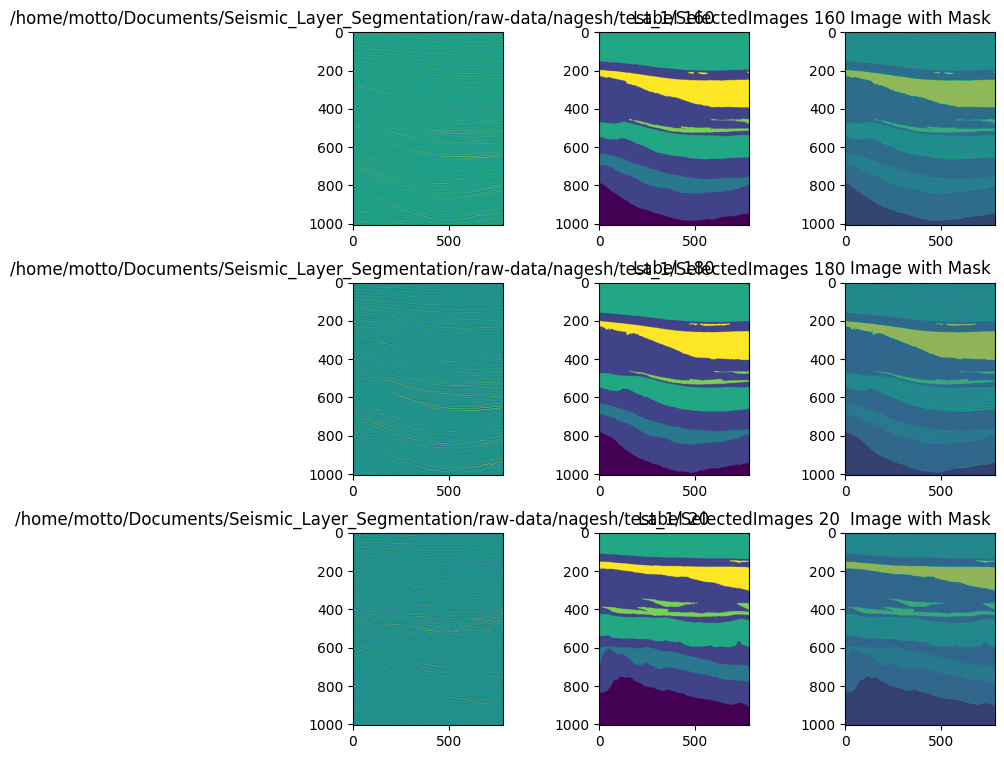

In [17]:
#@title Visualize samples of input and label image

names = ['160', '180', '20']
sample_slice_to_visualize = 'inline' # 'inline' or 'crossline'

if sample_slice_to_visualize == 'inline':
    data_images = [Image.open(os.path.join(INLINE_DATA_IMAGES_PATH, name + '.png')) for name in names]
    label_images = [Image.open(os.path.join(INLINE_LABEL_IMAGES_PATH, name + '.png')) for name in names]
else:
    data_images = [Image.open(os.path.join(CROSSLINE_DATA_IMAGES_PATH, name + '.png')) for name in names]
    label_images = [Image.open(os.path.join(CROSSLINE_LABEL_IMAGES_PATH, name + '.png')) for name in names]

   #convert the images into gray scale and pytorch tensors
transforms = T.Compose([T.Grayscale(), T.ToTensor()])
x = torch.stack([transforms(image) for image in data_images])
y = torch.stack([transforms(image) for image in label_images])

print(x.shape, y.shape)

fig = plt.figure(figsize=(9, 9))
num_images = len(names)

for i in range(num_images):
    ax = fig.add_subplot(num_images, 3, i*3+1)
    ax.imshow(data_images[i])
    ax.set_title(SEISMIC_ATTRIBUTE_NAME + " " + names[i])

    ax = fig.add_subplot(num_images, 3, i*3+2)
    ax.imshow(label_images[i])
    ax.set_title("Label " + names[i])

    ax = fig.add_subplot(num_images, 3, i*3+3)
    ax.imshow(x[i].squeeze())
    ax.imshow(y[i].squeeze(), alpha=0.5)
    ax.set_title("Image with Mask")

fig.subplots_adjust(hspace=0.3)
plt.show()

In [18]:
#@title Splitting data for training and validation

# Data images = train
inline_train_paths = [] # 10.png, 100.png, 101.png, ..., 11.png
inline_val_paths = []
crossline_train_paths = []
crossline_val_paths = []

# Label
inline_train_label_paths = []
inline_val_label_paths = []
crossline_train_label_paths = []
crossline_val_label_paths = []

for i in ("data", "label"):
    # 1. Inline
    if i == "data":
        inline_image_names = [f for f in os.listdir(INLINE_DATA_IMAGES_PATH) if f.endswith('.png')]
    elif i == "label":
        inline_image_names = [f for f in os.listdir(INLINE_LABEL_IMAGES_PATH) if f.endswith('.png')]

    # 1.1. Training Images
    # inline_train_image_names = inline_train_image_label_names
     # here split is used to split the image name ex 100.png into 100 , png
    inline_train_image_names = [f for f in inline_image_names if \
                      int(f.split('.')[0]) >= inline_train_range[0] and \
                        int(f.split('.')[0]) <= inline_train_range[1]]

    if i == "data":
        for name in inline_train_image_names:
            inline_train_paths.append(os.path.join(INLINE_DATA_IMAGES_PATH, name))
    elif i == "label":
        for name in inline_train_image_names:
            inline_train_label_paths.append(os.path.join(INLINE_LABEL_IMAGES_PATH, name))

    # 1.2. Validation Images
    # inline_val_image_names = inline_val_image_label_names
    inline_val_image_names = [f for f in inline_image_names if \
                      int(f.split('.')[0]) >= inline_val_range1[0] and \
                        int(f.split('.')[0]) <= inline_val_range1[1]]

    if i == "data":
        for f in inline_image_names:
            if int(f.split('.')[0]) >= inline_val_range2[0] and int(f.split('.')[0]) <= inline_val_range2[1]:
                inline_val_image_names.append(f)

        for name in inline_val_image_names:
            # inline_val_paths.append(os.path.abspath(os.path.join(INLINE_DATA_IMAGES_PATH, name)))
            inline_val_paths.append(os.path.join(INLINE_DATA_IMAGES_PATH, name))
    elif i == "label":
        for f in inline_image_names:
            if int(f.split('.')[0]) >= inline_val_range2[0] and int(f.split('.')[0]) <= inline_val_range2[1]:
                inline_val_image_names.append(f)

        for name in inline_val_image_names:
            inline_val_label_paths.append(os.path.join(INLINE_LABEL_IMAGES_PATH, name))



    # 2. crossline
    if i == "data":
        crossline_image_names = [f for f in os.listdir(CROSSLINE_DATA_IMAGES_PATH) if f.endswith('.png')]
    elif i == "label":
        crossline_image_names = [f for f in os.listdir(CROSSLINE_LABEL_IMAGES_PATH) if f.endswith('.png')]

    # 2.1. Training Images
    # crossline_train_image_names = crossline_train_image_label_names
    crossline_train_image_names = [f for f in crossline_image_names if \
                      int(f.split('.')[0]) >= crossline_train_range[0] and \
                        int(f.split('.')[0]) <= crossline_train_range[1]]

    if i == "data":
        for name in crossline_train_image_names:
            crossline_train_paths.append(os.path.join(CROSSLINE_DATA_IMAGES_PATH, name))
    elif i == "label":
        for name in crossline_train_image_names:
            crossline_train_label_paths.append(os.path.join(CROSSLINE_LABEL_IMAGES_PATH, name))

    # 2.2. Validation Images
    # crossline_val_image_names = crossline_val_image_label_names
    crossline_val_image_names = [f for f in crossline_image_names if \
                      int(f.split('.')[0]) >= crossline_val_range1[0] and \
                        int(f.split('.')[0]) <= crossline_val_range1[1]]

    if i == "data":
        for f in crossline_image_names:
            if int(f.split('.')[0]) >= crossline_val_range2[0] and int(f.split('.')[0]) <= crossline_val_range2[1]:
                crossline_val_image_names.append(f)

        for name in crossline_val_image_names:
            # crossline_val_paths.append(os.path.abspath(os.path.join(crossline_DATA_IMAGES_PATH, name)))
            crossline_val_paths.append(os.path.join(CROSSLINE_DATA_IMAGES_PATH, name))
    elif i == "label":
        for f in crossline_image_names:
            if int(f.split('.')[0]) >= crossline_val_range2[0] and int(f.split('.')[0]) <= crossline_val_range2[1]:
                crossline_val_image_names.append(f)

        for name in crossline_val_image_names:
            crossline_val_label_paths.append(os.path.join(CROSSLINE_LABEL_IMAGES_PATH, name))




# Merge inline and crossline
training_image_paths = inline_train_paths + crossline_train_paths
val_image_paths = inline_val_paths + crossline_val_paths

# Verify the lengths of the training and validation sets
print(f"Number of training samples: {len(training_image_paths)}")
print(f"Number of validation samples: {len(val_image_paths)}")

# with open('./output/training-image-paths.txt', 'w') as f:
#     for i in training_image_paths:
#         f.write(i + '\n')

# with open('./output/val-image-paths.txt', 'w') as f:
#     for i in val_image_paths:
#         f.write(i + '\n')



training_label_paths = inline_train_label_paths + crossline_train_label_paths
val_label_paths = inline_val_label_paths + crossline_val_label_paths

# with open('./output/training-label-paths.txt', 'w') as f:
#     for i in training_label_paths:
#         f.write(i + '\n')

# with open('./output/val-label-paths.txt', 'w') as f:
#     for i in val_label_paths:
#         f.write(i + '\n')

Number of training samples: 784
Number of validation samples: 198


In [19]:
#@title Utilities

class CustomDataset(Dataset):
    color_encoding = [
                ('a', (253, 231, 36)), # Gold
                ('b', (121, 209, 81)), # Light Green
                ('c', (68, 1, 84)), # Dark Purple
                ('d', (64, 67, 135)), # Medium Blue
                ('e', (34, 167, 132)), # Aquamarine
                ('f', (41, 120, 142)) # Cadet Blue
    ]

    def __init__(self, image_paths, label_paths, num_classes=NUM_CLASSES):
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.num_classes = num_classes
        self.transforms = T.Compose([T.ToTensor()])

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx])
        image = image.convert('RGB')

        image = self.transforms(image)
        resized_image = T.Resize(X_IMAGE_SIZE)(image)

        label = Image.open(self.label_paths[idx])
        label = label.convert('RGB')

        label = np.array(label)
        label = self.label_for_cross_entropy(label)
        label = Image.fromarray(label)
        resized_label = T.Resize(X_IMAGE_SIZE)(label)
        resized_label = np.array(resized_label)

        return resized_image, torch.from_numpy(resized_label).long()

    def label_for_cross_entropy(self, label):
        semantic_map = np.zeros(label.shape[:-1])
        semantic_map.fill(self.num_classes - 1)

        for class_index, color_info in enumerate(self.color_encoding):
            color = color_info[1]
            equality = np.equal(label, color)
            class_map = np.all(equality, axis=-1)
            semantic_map[class_map] = class_index

        return semantic_map

    def __len__(self):
        return len(self.label_paths)



def reverse_one_hot(image):
    image = image.permute(0, 2, 3, 1)
    x = torch.argmax(image, dim=-1)

    return x



# IoU Metric
def fast_hist(a, b, n):
    k = (a >= 0) & (a < n)
                          # np.bincount is used to count how often each unique combination of true and predicted label occurs
                          # reshpae convert the falt arry into n*n matrix and i,j pos in which no of times model predic ele j when the true class is i
    return np.bincount(n * a[k].astype(int) + b[k], minlength=n ** 2).reshape(n, n)

def per_class_iu(hist):
    epsilon = 1e-5

    return (np.diag(hist) + epsilon) / (hist.sum(1) + hist.sum(0) - np.diag(hist) + epsilon)



def val(model, dataloader):
    print('\n\n\t------- Start validating -------')
    accuracy_arr = []
    hist = np.zeros((NUM_CLASSES, NUM_CLASSES))

    with torch.no_grad():
        model.eval()

        val_loss_record = []

        for _, (val_data, val_label) in enumerate(dataloader):
            val_data_cuda = val_data.cuda()
            val_label_cuda = val_label.cuda()

            val_output = model(val_data_cuda)
            # it is used to compute loss between model prediction and ground truth
            val_loss = loss_func(val_output, val_label_cuda)

            val_output = val_output.squeeze()
            val_output = reverse_one_hot(val_output)
            val_output = np.array(val_output.cpu())

            val_label = val_label.squeeze()
            val_label = np.array(val_label.cpu())

            hist += fast_hist(val_label.flatten(), val_output.flatten(), NUM_CLASSES)
                # it convert the pytorch tensor into python scalar
            val_loss_record.append(val_loss.item())

        mean_accuracy = np.mean(accuracy_arr)

        miou_list = per_class_iu(hist)
        mean_iou = np.mean(miou_list)

        # wIoU SEG 2020 paper
        class_weight = hist.sum(axis=1) / hist.sum()
        weighted_iou = (class_weight[class_weight > 0] * miou_list[class_weight > 0]).sum()

        val_loss_mean = np.mean(val_loss_record)

        print('Mean validation loss: {}\nMean validation IoU: {}\nWeighted validation IoU: {}'.format(val_loss_mean, mean_iou, weighted_iou))

        return mean_accuracy, mean_iou, val_loss_mean

In [20]:
#@title Training and validation data preparation

train_dataset = CustomDataset(training_image_paths, training_label_paths)
val_dataset = CustomDataset(val_image_paths, val_label_paths)

dataloader_train = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
dataloader_val = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
steps = len(train_dataset) // BATCH_SIZE
print(steps, "steps per epoch")

392 steps per epoch


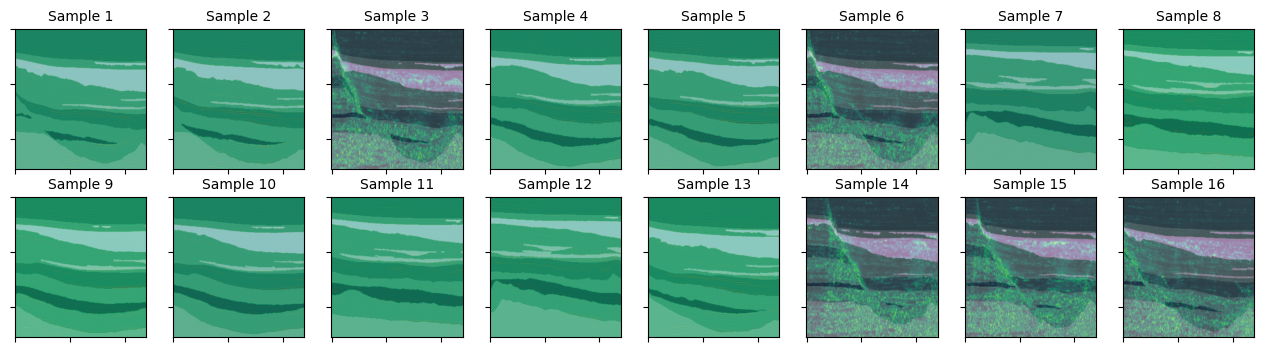

In [21]:
#@title Visualize training dataset

max_images = 16
grid_width = 8
grid_height = max_images // grid_width
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width * 2, grid_height * 2))

for i in range(max_images):
    image, label = train_dataset[i]
    image = np.transpose(image, (1, 2, 0))
    ax = axs[i // grid_width, i % grid_width]
    ax.imshow(image.squeeze(), cmap="Greys")
    ax.imshow(label.squeeze(), alpha=0.5, cmap="Greens")
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(f"Sample {i+1}", fontsize=10)

plt.show()

In [22]:
del train_dataset, val_dataset

In [23]:
# #@title Modeling Saiful - Basic U-Net version 2.1

# class ConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
#         super(ConvBlock, self).__init__()
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
#         self.batch_norm = nn.BatchNorm2d(out_channels)
#         self.activation = nn.ReLU()

#     def forward(self, x):
#         x = self.conv(x)
#         x = self.batch_norm(x)
#         x = self.activation(x)

#         return x



# class DoubleConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
#         super(DoubleConvBlock, self).__init__()
#         self.conv1 = ConvBlock(in_channels, out_channels, kernel_size, stride, padding)
#         self.conv2 = ConvBlock(out_channels, out_channels, kernel_size, stride, padding)

#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)

#         return x



# class UpBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=2):
#         super(UpBlock, self).__init__()
#         self.upconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size)

#     def forward(self, x1, x2):
#         # x1 from contracting path (downsampling/encoder)
#         x2 = self.upconv(x2)

#         # Crop x2 to match the shape of x1
#         if x2.shape != x1.shape:
#             x2 = TF.resize(x2, size=x1.shape[2:])

#         # Or pad the expanding path feature map
#         # if x2.shape != x1.shape:
#         #     diffY = x1.size()[2] - x2.size()[2]
#         #     diffX = x1.size()[3] - x2.size()[3]
#         #     x2 = F.pad(x2, (diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2))

#         x = torch.cat([x1, x2], dim=1)

#         return x



# class OutputBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=1):
#         super(OutputBlock, self).__init__()
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size)
#         # self.activation = nn.Softmax()

#     def forward(self,x):
#         x = self.conv(x)
#         # x = self.activation(x)

#         return x



# class UNet(nn.Module):
#     def __init__(self, in_channels=3, n_classes=7, starting_filter=64):
#         super(UNet, self).__init__()
#         self.downsampling = nn.MaxPool2d(2, 2)
#         self.dropout = nn.Dropout(0.5)

#         self.down_conv1 = DoubleConvBlock(in_channels, starting_filter)
#         self.down_conv2 = DoubleConvBlock(starting_filter, starting_filter * 2)
#         self.down_conv3 = DoubleConvBlock(starting_filter * 2, starting_filter * 4)
#         self.down_conv4 = DoubleConvBlock(starting_filter * 4, starting_filter * 8)

#         self.middle = DoubleConvBlock(starting_filter * 8, starting_filter * 16)

#         self.up1 = UpBlock(starting_filter * 16, starting_filter * 8)
#         self.up_conv1 = DoubleConvBlock(starting_filter * 16, starting_filter * 8)

#         self.up2 = UpBlock(starting_filter * 8, starting_filter * 4)
#         self.up_conv2 = DoubleConvBlock(starting_filter * 8, starting_filter * 4)

#         self.up3 = UpBlock(starting_filter * 4, starting_filter * 2)
#         self.up_conv3 = DoubleConvBlock(starting_filter * 4, starting_filter * 2)

#         self.up4 = UpBlock(starting_filter * 2, starting_filter)
#         self.up_conv4 = DoubleConvBlock(starting_filter * 2, starting_filter)

#         self.final = OutputBlock(starting_filter, n_classes)

#     def forward(self, x):
#         # Contracting Path (Encoder)
#         down1 = self.down_conv1(x)
#         x = self.downsampling(down1)
#         x = self.dropout(x)

#         down2 = self.down_conv2(x)
#         x = self.downsampling(down2)
#         x = self.dropout(x)

#         down3 = self.down_conv3(x)
#         x = self.downsampling(down3)
#         x = self.dropout(x)

#         down4 = self.down_conv4(x)
#         x = self.downsampling(down4)
#         x = self.dropout(x)



#         # Bottleneck Layer

#         x = self.middle(x)



#         # Expansive Path (Decoder)
#         x = self.up1(down4, x)
#         x = self.dropout(x)
#         x = self.up_conv1(x)

#         x = self.up2(down3, x)
#         x = self.dropout(x)
#         x = self.up_conv2(x)

#         x = self.up3(down2, x)
#         x = self.dropout(x)
#         x = self.up_conv3(x)

#         x = self.up4(down1, x)
#         x = self.dropout(x)
#         x = self.up_conv4(x)

#         # Output Layer
#         x = self.dropout(x)
#         x = self.final(x)

#         return x

In [24]:
# import torch
# import torch.nn as nn
# import torchvision.transforms.functional as TF

# #  only have the residual connection in the code that all

# class ConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
#         super(ConvBlock, self).__init__()
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
#         self.batch_norm = nn.BatchNorm2d(out_channels)
#         self.activation = nn.ReLU()

#     def forward(self, x):
#         x = self.conv(x)
#         x = self.batch_norm(x)
#         x = self.activation(x)
#         return x


# class DoubleConvBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
#         super(DoubleConvBlock, self).__init__()
#         self.conv1 = ConvBlock(in_channels, out_channels, kernel_size, stride, padding)
#         self.conv2 = ConvBlock(out_channels, out_channels, kernel_size, stride, padding)
        
#         # Residual connection: 1x1 convolution if in_channels != out_channels
#         if in_channels != out_channels:
#             self.residual_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1)
#         else:
#             self.residual_conv = None

#     def forward(self, x):
#         residual = x  # Original input
#         x = self.conv1(x)
#         x = self.conv2(x)
        
#         # Adjust the residual connection if in_channels != out_channels
#         if self.residual_conv:
#             residual = self.residual_conv(residual)
        
#         return x + residual  # Adding the residual connection


# class UpBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=2):
#         super(UpBlock, self).__init__()
#         self.upconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size)

#     def forward(self, x1, x2):
#         # x1 from contracting path (downsampling/encoder)
#         x2 = self.upconv(x2)

#         # Crop x2 to match the shape of x1
#         if x2.shape != x1.shape:
#             x2 = TF.resize(x2, size=x1.shape[2:])

#         x = torch.cat([x1, x2], dim=1)
#         return x


# class OutputBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size=1):
#         super(OutputBlock, self).__init__()
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size)

#     def forward(self, x):
#         x = self.conv(x)
#         return x


# class UNet(nn.Module):
#     def __init__(self, in_channels=3, n_classes=7, starting_filter=64):
#         super(UNet, self).__init__()
#         self.downsampling = nn.MaxPool2d(2, 2)
#         self.dropout = nn.Dropout(0.5)

#         # Encoder (Contracting Path)
#         self.down_conv1 = DoubleConvBlock(in_channels, starting_filter)
#         self.down_conv2 = DoubleConvBlock(starting_filter, starting_filter * 2)
#         self.down_conv3 = DoubleConvBlock(starting_filter * 2, starting_filter * 4)
#         self.down_conv4 = DoubleConvBlock(starting_filter * 4, starting_filter * 8)

#         # Bottleneck
#         self.middle = DoubleConvBlock(starting_filter * 8, starting_filter * 16)

#         # Decoder (Expanding Path)
#         self.up1 = UpBlock(starting_filter * 16, starting_filter * 8)
#         self.up_conv1 = DoubleConvBlock(starting_filter * 16, starting_filter * 8)

#         self.up2 = UpBlock(starting_filter * 8, starting_filter * 4)
#         self.up_conv2 = DoubleConvBlock(starting_filter * 8, starting_filter * 4)

#         self.up3 = UpBlock(starting_filter * 4, starting_filter * 2)
#         self.up_conv3 = DoubleConvBlock(starting_filter * 4, starting_filter * 2)

#         self.up4 = UpBlock(starting_filter * 2, starting_filter)
#         self.up_conv4 = DoubleConvBlock(starting_filter * 2, starting_filter)

#         # Output Layer
#         self.final = OutputBlock(starting_filter, n_classes)

#     def forward(self, x):
#         # Encoder
#         down1 = self.down_conv1(x)
#         x = self.downsampling(down1)
#         x = self.dropout(x)

#         down2 = self.down_conv2(x)
#         x = self.downsampling(down2)
#         x = self.dropout(x)

#         down3 = self.down_conv3(x)
#         x = self.downsampling(down3)
#         x = self.dropout(x)

#         down4 = self.down_conv4(x)
#         x = self.downsampling(down4)
#         x = self.dropout(x)

#         # Bottleneck
#         x = self.middle(x)

#         # Decoder
#         x = self.up1(down4, x)
#         x = self.dropout(x)
#         x = self.up_conv1(x)

#         x = self.up2(down3, x)
#         x = self.dropout(x)
#         x = self.up_conv2(x)

#         x = self.up3(down2, x)
#         x = self.dropout(x)
#         x = self.up_conv3(x)

#         x = self.up4(down1, x)
#         x = self.dropout(x)
#         x = self.up_conv4(x)

#         # Output Layer
#         x = self.dropout(x)
#         x = self.final(x)

#         return x


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF

# Attention Gate class
class AttentionGate(nn.Module):
    def __init__(self, in_channels, gating_channels, inter_channels=32):
        super(AttentionGate, self).__init__()
        self.W_g = nn.Conv2d(gating_channels, inter_channels, kernel_size=1)  # Gating convolution
        self.W_x = nn.Conv2d(in_channels, inter_channels, kernel_size=1)  # Encoder convolution
        self.psi = nn.Conv2d(inter_channels, 1, kernel_size=1)  # Output attention map
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, g):
        # x: Encoder feature map
        # g: Gating feature map (from decoder)
        g1 = self.W_g(g)  # Apply convolution to the gating signal
        x1 = self.W_x(x)  # Apply convolution to the encoder feature map
        attn = self.sigmoid(self.psi(F.relu(g1 + x1)))  # Attention map
        return x * attn  # Apply attention map to encoder feature map


# ConvBlock class (unchanged)
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.batch_norm = nn.BatchNorm2d(out_channels)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.conv(x)
        x = self.batch_norm(x)
        x = self.activation(x)
        return x


# DoubleConvBlock class with Residual and Attention Connection
class DoubleConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(DoubleConvBlock, self).__init__()
        self.conv1 = ConvBlock(in_channels, out_channels, kernel_size, stride, padding)
        self.conv2 = ConvBlock(out_channels, out_channels, kernel_size, stride, padding)
        
        # Residual connection: 1x1 convolution if in_channels != out_channels
        if in_channels != out_channels:
            self.residual_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1)
        else:
            self.residual_conv = None

    def forward(self, x):
        residual = x  # Original input
        x = self.conv1(x)
        x = self.conv2(x)
        
        # Adjust the residual connection if in_channels != out_channels
        if self.residual_conv:
            residual = self.residual_conv(residual)
        
        return x + residual  # Adding the residual connection


# UpBlock class with Attention-Gated Skip Connection
class UpBlockWithAttention(nn.Module):
    def __init__(self, in_channels, out_channels, gating_channels, kernel_size=2):
        super(UpBlockWithAttention, self).__init__()
        self.upconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size)
        self.attn_gate = AttentionGate(in_channels, gating_channels)

    def forward(self, x1, x2):
        # x1 is from the encoder (contracting path)
        # x2 is the upsampled feature map from the decoder (gating signal)

        x2 = self.upconv(x2)

        # Apply attention gate to focus on relevant features from encoder
        x2 = self.attn_gate(x1, x2)

        # Resize x2 to match the shape of x1
        if x2.shape != x1.shape:
            x2 = TF.resize(x2, size=x1.shape[2:])

        # Concatenate the encoder and decoder features
        x = torch.cat([x1, x2], dim=1)

        return x


# OutputBlock class (unchanged)
class OutputBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=1):
        super(OutputBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size)

    def forward(self, x):
        x = self.conv(x)
        return x


# UNet class with Attention-Gated Skip Connections
class UNet(nn.Module):
    def __init__(self, in_channels=3, n_classes=7, starting_filter=64):
        super(UNet, self).__init__()
        self.downsampling = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        # Encoder (Contracting Path)
        self.down_conv1 = DoubleConvBlock(in_channels, starting_filter)
        self.down_conv2 = DoubleConvBlock(starting_filter, starting_filter * 2)
        self.down_conv3 = DoubleConvBlock(starting_filter * 2, starting_filter * 4)
        self.down_conv4 = DoubleConvBlock(starting_filter * 4, starting_filter * 8)

        # Bottleneck
        self.middle = DoubleConvBlock(starting_filter * 8, starting_filter * 16)

        # Decoder (Expanding Path)
        self.up1 = UpBlockWithAttention(starting_filter * 16, starting_filter * 8, starting_filter * 16)
        self.up_conv1 = DoubleConvBlock(starting_filter * 16, starting_filter * 8)

        self.up2 = UpBlockWithAttention(starting_filter * 8, starting_filter * 4, starting_filter * 8)
        self.up_conv2 = DoubleConvBlock(starting_filter * 8, starting_filter * 4)

        self.up3 = UpBlockWithAttention(starting_filter * 4, starting_filter * 2, starting_filter * 4)
        self.up_conv3 = DoubleConvBlock(starting_filter * 4, starting_filter * 2)

        self.up4 = UpBlockWithAttention(starting_filter * 2, starting_filter, starting_filter * 2)
        self.up_conv4 = DoubleConvBlock(starting_filter * 2, starting_filter)

        # Output Layer
        self.final = OutputBlock(starting_filter, n_classes)

    def forward(self, x):
        # Encoder
        down1 = self.down_conv1(x)
        x = self.downsampling(down1)
        x = self.dropout(x)

        down2 = self.down_conv2(x)
        x = self.downsampling(down2)
        x = self.dropout(x)

        down3 = self.down_conv3(x)
        x = self.downsampling(down3)
        x = self.dropout(x)

        down4 = self.down_conv4(x)
        x = self.downsampling(down4)
        x = self.dropout(x)

        # Bottleneck
        x = self.middle(x)

        # Decoder with Attention-Gated Skip Connections
        x = self.up1(down4, x)class UNet(nn.Module):
    def __init__(self, in_channels=3, n_classes=7, starting_filter=64):
        super(UNet, self).__init__()
        self.downsampling = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        # Encoder (Contracting Path)
        self.down_conv1 = DoubleConvBlock(in_channels, starting_filter)
        self.down_conv2 = DoubleConvBlock(starting_filter, starting_filter * 2)
        self.down_conv3 = DoubleConvBlock(starting_filter * 2, starting_filter * 4)
        self.down_conv4 = DoubleConvBlock(starting_filter * 4, starting_filter * 8)

        # Bottleneck
        self.middle = DoubleConvBlock(starting_filter * 8, starting_filter * 16)

        # Decoder (Expanding Path)
        self.up1 = UpBlock(starting_filter * 16, starting_filter * 8)
        self.up_conv1 = DoubleConvBlock(starting_filter * 16, starting_filter * 8)

        self.up2 = UpBlock(starting_filter * 8, starting_filter * 4)
        self.up_conv2 = DoubleConvBlock(starting_filter * 8, starting_filter * 4)

        self.up3 = UpBlock(starting_filter * 4, starting_filter * 2)
        self.up_conv3 = DoubleConvBlock(starting_filter * 4, starting_filter * 2)

        self.up4 = UpBlock(starting_filter * 2, starting_filter)
        self.up_conv4 = DoubleConvBlock(starting_filter * 2, starting_filter)

        # Output Layer
        self.final = OutputBlock(starting_filter, n_classes)

    def forward(self, x):class UNet(nn.Module):
    def __init__(self, in_channels=3, n_classes=7, starting_filter=64):
        super(UNet, self).__init__()
        self.downsampling = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        # Encoder (Contracting Path)
        self.down_conv1 = DoubleConvBlock(in_channels, starting_filter)
        self.down_conv2 = DoubleConvBlock(starting_filter, starting_filter * 2)
        self.down_conv3 = DoubleConvBlock(starting_filter * 2, starting_filter * 4)
        self.down_conv4 = DoubleConvBlock(starting_filter * 4, starting_filter * 8)

        # Bottleneck
        self.middle = DoubleConvBlock(starting_filter * 8, starting_filter * 16)

        # Decoder (Expanding Path)
        self.up1 = UpBlock(starting_filter * 16, starting_filter * 8)
        self.up_conv1 = DoubleConvBlock(starting_filter * 16, starting_filter * 8)

        self.up2 = UpBlock(starting_filter * 8, starting_filter * 4)
        self.up_conv2 = DoubleConvBlock(starting_filter * 8, starting_filter * 4)

        self.up3 = UpBlock(starting_filter * 4, starting_filter * 2)
        self.up_conv3 = DoubleConvBlock(starting_filter * 4, starting_filter * 2)

        self.up4 = UpBlock(starting_filter * 2, starting_filter)
        self.up_conv4 = DoubleConvBlock(starting_filter * 2, starting_filter)

        # Output Layer
        self.final = OutputBlock(starting_filter, n_classes)

    def forward(self, x):
        # Encoder
        down1 = self.down_conv1(x)
        x = self.downsampling(down1)
        x = self.dropout(x)

        down2 = self.down_conv2(x)
        x = self.downsampling(down2)
        x = self.dropout(x)

        down3 = self.down_conv3(x)
        x = self.downsampling(down3)
        x = self.dropout(x)

        down4 = self.down_conv4(x)
        x = self.downsampling(down4)
        x = self.dropout(x)

        # Bottleneck
        x = self.middle(x)

        # Decoder with Attention-based Upsampling
        x = self.up1(down4, x)
        x = self.dropout(x)
        x = self.up_conv1(x)

        x = self.up2(down3, x)
        x = self.dropout(x)
        x = self.up_conv2(x)

        x = self.up3(down2, x)
        x = self.dropout(x)
        x = self.up_conv3(x)

        x = self.up4(down1, x)
        x = self.dropout(x)
        x = self.up_conv4(x)

        # Output Layer
        x = self.dropout(x)
        x = self.final(x)

        return x

        # Encoder
        down1 = self.down_conv1(x)
        x = self.downsampling(down1)
        x = self.dropout(x)

        down2 = self.down_conv2(x)
        x = self.downsampling(down2)
        x = self.dropout(x)

        down3 = self.down_conv3(x)
        x = self.downsampling(down3)
        x = self.dropout(x)

        down4 = self.down_conv4(x)
        x = self.downsampling(down4)
        x = self.dropout(x)

        # Bottleneck
        x = self.middle(x)

        # Decoder with Attention-based Upsampling
        x = self.up1(down4, x)
        x = self.dropout(x)
        x = self.up_conv1(x)

        x = self.up2(down3, x)
        x = self.dropout(x)
        x = self.up_conv2(x)

        x = self.up3(down2, x)
        x = self.dropout(x)
        x = self.up_conv3(x)

        x = self.up4(down1, x)
        x = self.dropout(x)
        x = self.up_conv4(x)

        # Output Layer
        x = self.dropout(x)
        x = self.final(x)

        return x

        x = self.dropout(x)
        x = self.up_conv1(x)

        x = self.up2(down3, x)
        x = self.dropout(x)
        x = self.up_conv2(x)

        x = self.up3(down2, x)
        x = self.dropout(x)
        x = self.up_conv3(x)

        x = self.up4(down1, x)
        x = self.dropout(x)
        x = self.up_conv4(x)

        # Output Layer
        x = self.dropout(x)
        x = self.final(x)

        return x


In [26]:
#@title Training

torch.cuda.empty_cache()
model = UNet().to(device)
optimizer = torch.optim.Adam(model.parameters())

train_loss_hist = []
val_loss_hist = []

max_miou = 0
max_miou_epoch = 0
train_iou_hist = []
val_iou_hist = []

start_training = time.time()
start_trianing_so_far = time.time()

for epoch in range(EPOCHS):
    model.train()
    start_epoch = time.time()

    print()
    tq = tqdm(total=len(dataloader_train) * BATCH_SIZE)
    tq.set_description('Epoch {}/{}'.format(epoch + 1, EPOCHS))

    hist = np.zeros((NUM_CLASSES, NUM_CLASSES))
    loss_record = []

    for i, (data, label) in enumerate(dataloader_train):
        data = data.cuda()
        label = label.cuda()

        output = model(data)
        loss = loss_func(output, label)

        tq.update(BATCH_SIZE)
        tq.set_postfix(loss='%.6f' % loss)
        output = reverse_one_hot(output)
        output = np.array(output.cpu())

        optimizer.zero_grad()
        loss.backward()

        # nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0) # Gradient Clipping
        optimizer.step()

        loss_record.append(loss.item())
        hist += fast_hist(label.flatten().detach().cpu().numpy(), output.flatten(), NUM_CLASSES)

    tq.close()
    epoch_time_elapsed = time.time() - start_epoch
    training_so_far_time_elapsed = time.time() - start_trianing_so_far
    loss_train_mean = np.mean(loss_record)
    train_loss_hist = train_loss_hist + [loss_train_mean]

    miou_list = per_class_iu(hist)
    mean_iou = np.mean(miou_list)
    train_iou_hist = train_iou_hist + [mean_iou]

    print('loss for train : %f' % (loss_train_mean))
    print('IoU for train : %f' % (mean_iou))
    print('Epoch {} completed in {:.0f}m {:.0f}s'.format(str(epoch + 1), epoch_time_elapsed // 60, epoch_time_elapsed % 60))
    print('So far it takes: {:.0f}m {:.0f}s'.format(training_so_far_time_elapsed // 60, training_so_far_time_elapsed % 60))

    # Save checkpoint
    if epoch % CHECKPOINT_STEP == 0:
        torch.save(model.state_dict(), LATEST_MODEL_PATH)

    # Validate save best model
    if epoch % VALIDATE_STEP == 0:
        _, mean_iou, val_loss = val(model, dataloader_val)
        val_iou_hist = val_iou_hist + [mean_iou]
        val_loss_hist = val_loss_hist + [val_loss]

        if mean_iou > max_miou:
            max_miou = mean_iou
            max_miou_epoch = epoch + 1
            torch.save(model.state_dict(), BEST_MODEL_PATH)
            print(' *** Saving the best model with mIoU = {}'.format(mean_iou))
        else:
            print('Best mIoU: {} at epoch {}'.format(max_miou, max_miou_epoch))



training_time_elapsed = time.time() - start_training
training_duration = '{:.0f}m {:.0f}s'.format(training_time_elapsed // 60, training_time_elapsed % 60)
print(f'Training completed in {training_duration}')

Epoch 1/15:   0%|          | 0/784 [00:00<?, ?it/s]

RuntimeError: Given groups=1, weight of size [32, 1024, 1, 1], expected input[2, 512, 17, 16] to have 1024 channels, but got 512 channels instead

In [ ]:
# #@title Training

# torch.cuda.empty_cache()
# model = UNet().to(device)
# optimizer = torch.optim.Adam(model.parameters())

# train_loss_hist = []
# val_loss_hist = []

# max_miou = 0
# max_miou_epoch = 0
# train_iou_hist = []
# val_iou_hist = []

# start_training = time.time()
# start_trianing_so_far = time.time()

# for epoch in range(EPOCHS):
#     model.train()
#     start_epoch = time.time()

#     print(f"Epoch {epoch + 1}/{EPOCHS}")
#     print(f"CUDA Memory Allocated: {torch.cuda.memory_allocated() / 1e6} MB")
#     print(f"CUDA Memory Cached: {torch.cuda.memory_reserved() / 1e6} MB")

#     tq = tqdm(total=len(dataloader_train) * BATCH_SIZE)
#     tq.set_description('Epoch {}/{}'.format(epoch + 1, EPOCHS))

#     hist = np.zeros((NUM_CLASSES, NUM_CLASSES))
#     loss_record = []

#     for i, (data, label) in enumerate(dataloader_train):
#         data = data.cuda()
#         label = label.cuda()

#         # Debug data and label shapes if necessary
#         if i == 0:
#             print(f"Data batch shape: {data.shape}, Label batch shape: {label.shape}")

#         output = model(data)
#         loss = loss_func(output, label)

#         tq.update(BATCH_SIZE)
#         if i % 10 == 0:
#             tq.set_postfix(loss='%.6f' % loss.item())
#         output = reverse_one_hot(output)
#         output = np.array(output.cpu())

#         optimizer.zero_grad()
#         loss.backward()

#         # Apply gradient clipping
#         nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
#         optimizer.step()

#         loss_record.append(loss.item())
#         hist += fast_hist(label.flatten().detach().cpu().numpy(), output.flatten(), NUM_CLASSES)

#     tq.close()
#     epoch_time_elapsed = time.time() - start_epoch
#     training_so_far_time_elapsed = time.time() - start_trianing_so_far
#     loss_train_mean = np.mean(loss_record)
#     train_loss_hist.append(loss_train_mean)

#     miou_list = per_class_iu(hist)
#     mean_iou = np.mean(miou_list)
#     train_iou_hist.append(mean_iou)

#     print('Train Loss : {:.6f}'.format(loss_train_mean))
#     print('Train IoU : {:.6f}'.format(mean_iou))
#     print('Epoch completed in {:.0f}m {:.0f}s'.format(epoch_time_elapsed // 60, epoch_time_elapsed % 60))
#     print('Total time elapsed: {:.0f}m {:.0f}s'.format(training_so_far_time_elapsed // 60, training_so_far_time_elapsed % 60))

#     # Save checkpoint
#     if epoch % CHECKPOINT_STEP == 0:
#         torch.save(model.state_dict(), LATEST_MODEL_PATH)

#     # Validation and save best model
#     if epoch % VALIDATE_STEP == 0:
#         _, mean_iou, val_loss = val(model, dataloader_val)
#         val_iou_hist.append(mean_iou)
#         val_loss_hist.append(val_loss)

#         if mean_iou > max_miou:
#             max_miou = mean_iou
#             max_miou_epoch = epoch + 1
#             torch.save(model.state_dict(), BEST_MODEL_PATH)
#             print(f' *** Saving the best model with mIoU = {mean_iou:.6f}')
#         else:
#             print(f'Best mIoU: {max_miou:.6f} at epoch {max_miou_epoch}')

# training_time_elapsed = time.time() - start_training
# print(f'Training completed in {training_time_elapsed // 60:.0f}m {training_time_elapsed % 60:.0f}s')


In [ ]:
# print(f"Total images found: {len(self.image_paths)}")

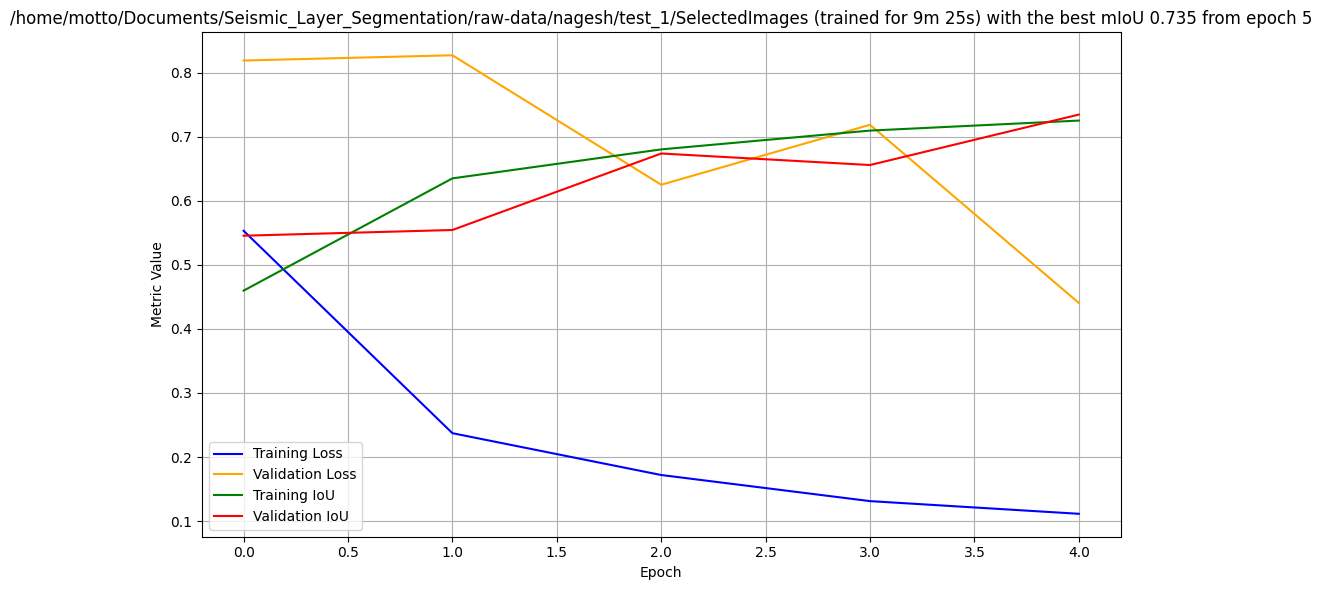

In [ ]:
#@title Visualize Training and Validation Curve

plt.figure(figsize=(10, 6))

plt.plot(train_loss_hist, label='Training Loss', color='blue')
plt.plot(val_loss_hist, label='Validation Loss', color='orange')
plt.plot(train_iou_hist, label='Training IoU', color='green')
plt.plot(val_iou_hist, label='Validation IoU', color='red')

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title(f'{SEISMIC_ATTRIBUTE_NAME} (trained for {training_duration}) with the best mIoU {max_miou:.3f} from epoch {max_miou_epoch}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig(os.path.join(PERFORMANCE_PATH, 'training-curve.png'))
plt.show()

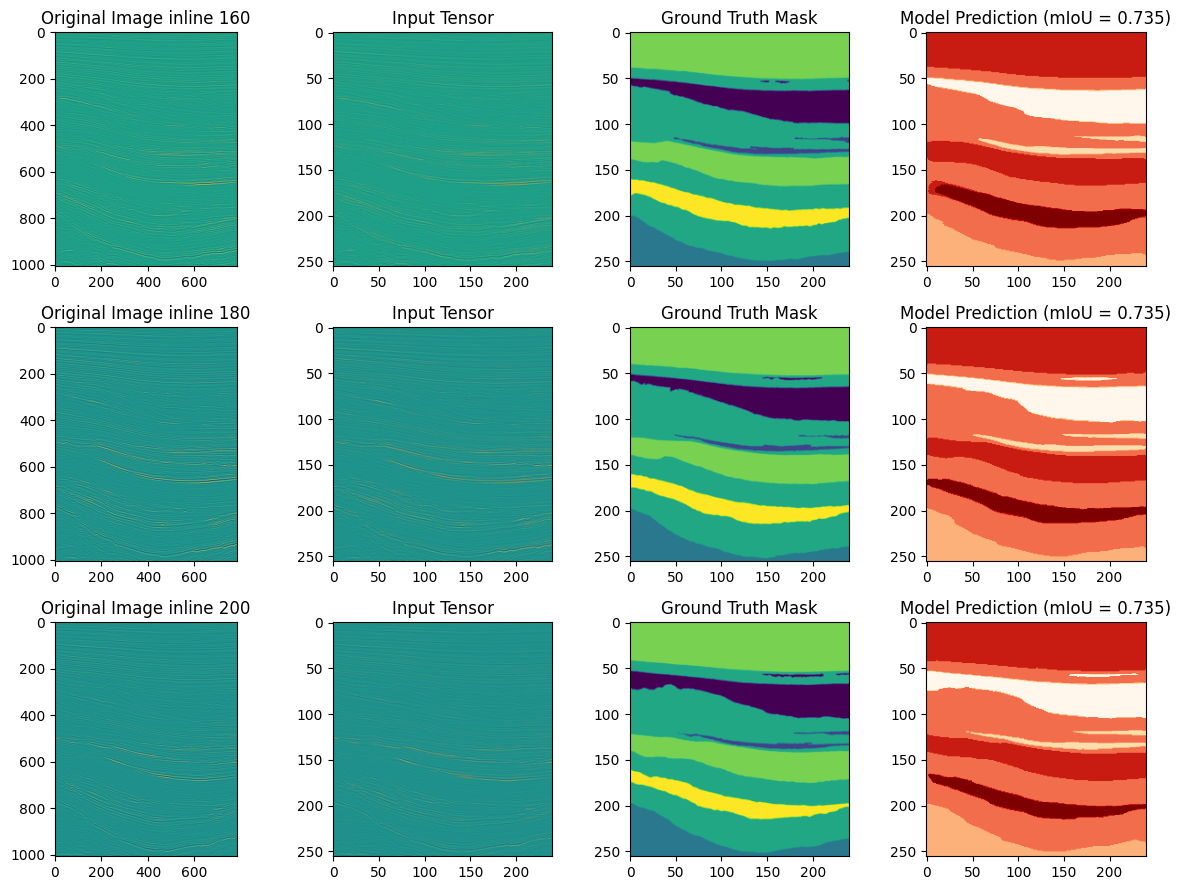

In [ ]:
#@title Model Prediction on Sample Images

color_encoding = [
        ('a', (253, 231, 36)), # Gold
        ('b', (121, 209, 81)), # Light Green
        ('c', (68, 1, 84)), # Dark Purple
        ('d', (64, 67, 135)), # Medium Blue
        ('e', (34, 167, 132)), # Aquamarine
        ('f', (41, 120, 142)) # Cadet Blue
]

def label_for_cross_entropy(label):
    semantic_map = np.zeros(label.shape[:-1])
    semantic_map.fill(NUM_CLASSES - 1)

    for class_index, color_info in enumerate(color_encoding):
        color = color_info[1]
        equality = np.equal(label, color)
        class_map = np.all(equality, axis=-1)
        semantic_map[class_map] = class_index

    return semantic_map


# Load Best Model
model = UNet().to(device)
model.load_state_dict(torch.load(BEST_MODEL_PATH))
torch.save(model.state_dict(), os.path.join(PERFORMANCE_PATH, BEST_MODEL_NAME))
model = model.to(device)
model.eval()

slice_to_visualize = 'inline' # 'inline' or 'crossline'
names = ['160', '180', '200']

if slice_to_visualize == 'inline':
    data_images = [Image.open(os.path.join(INLINE_DATA_IMAGES_PATH, name + '.png')) for name in names]
    label_images = [Image.open(os.path.join(INLINE_LABEL_IMAGES_PATH, name + '.png')) for name in names]
else:
    data_images = [Image.open(os.path.join(CROSSLINE_DATA_IMAGES_PATH, name + '.png')) for name in names]
    label_images = [Image.open(os.path.join(CROSSLINE_LABEL_IMAGES_PATH, name + '.png')) for name in names]

data_images = [i.convert('RGB') for i in data_images]

label_images = [i.convert('RGB') for i in label_images]
label_images = [np.array(i) for i in label_images]
label_images = [label_for_cross_entropy(i) for i in label_images]
label_images = [Image.fromarray(i) for i in label_images]

# Apply transformations to convert images to tensors
transforms = T.Compose([T.ToTensor(), T.Resize(X_IMAGE_SIZE)])
x = torch.stack([transforms(image) for image in data_images])
y = torch.stack([transforms(mask) for mask in label_images])

x = x.to(device)
outputs = model(x)
outputs =  outputs.squeeze()
outputs = np.array(outputs.detach().cpu())

# Visualize the sample images, ground truth masks, and model predictions
fig = plt.figure(figsize=(12, 9))

for i in range(len(names)):
    # Plot original image
    ax = fig.add_subplot(3, 4, i*4+1)
    plt.imshow(data_images[i])
    ax.set_title(f'Original Image {slice_to_visualize} {names[i]}')

    # Plot input tensor
    ax = fig.add_subplot(3, 4, i*4+2)
    x_numpy = x[i].squeeze().cpu().numpy()
    x_numpy = np.transpose(x_numpy, (1, 2, 0))
    ax.imshow(x_numpy.squeeze())
    ax.set_title('Input Tensor')

    # Plot ground truth mask
    ax = fig.add_subplot(3, 4, i*4+3)
    ax.imshow(y[i].squeeze())
    ax.set_title('Ground Truth Mask')

    # Plot model prediction
    ax = fig.add_subplot(3, 4, i*4+4)
    output = outputs[i].squeeze()
    output_tensor = torch.from_numpy(output)
    class_labels = torch.argmax(output_tensor, dim=0)
    class_labels_np = class_labels.cpu().numpy().astype(np.uint8)
    ax.imshow(class_labels_np, cmap="OrRd")
    ax.set_title(f"Model Prediction (mIoU = {max_miou:.3f})")

plt.tight_layout()
plt.savefig(os.path.join(PERFORMANCE_PATH, 'prediction.png'))
plt.show()